Midterm Project <br>
Do Less Populated Regions Provide a Better Measure of Well-Being?

The first step is to wrangle our data so that we are able to properly utilize the thinkstats2 and pandas libraries. We'll start with the data on educational establishments and build up better column names.


In [2]:
%matplotlib inline

import numpy
import pandas
# import thinkstats2

frame = pandas.read_csv('datasets/educational_est_values.csv', sep=',', encoding='latin-1', skiprows=1)
edu_by_geo = frame.set_index('Geographic area name', drop=False)
print("List of columns\n")
print(edu_by_geo.columns)
print("\nType of Educational Services and Totals\n")
print(edu_by_geo['Meaning of 2012 NAICS code'].value_counts())


List of columns

Index(['Geographic identifier code', 'Id2', 'Geographic area name',
       '2012 NAICS code', 'Meaning of 2012 NAICS code',
       'Type of operation or tax status code',
       'Meaning of Type of operation or tax status code', 'Year',
       'Number of establishments', 'Receipts/Revenue ($1,000)',
       'Operating expenses ($1,000)', 'Annual payroll ($1,000)',
       'First-quarter payroll ($1,000)',
       'Number of paid employees for pay period including March 12',
       'Percent of receipts/revenue from administrative records (%)',
       'Percent of receipts/revenue estimated (%)'],
      dtype='object')

Type of Educational Services and Totals

Educational support services                               1269
Educational services                                        990
Sports and recreation instruction                           922
Fine arts schools                                           916
Technical and trade schools                                 908


In [3]:
# print(edu_by_geo['Geographic area name'].value_counts())
# The above is an issue, we need to find the number of establishments in each region.

print(len(edu_by_geo['Geographic area name'].unique()))

166


In [4]:
all_edu_est = edu_by_geo[edu_by_geo['Meaning of Type of operation or tax status code'] == 'All establishments']
flattened_all_edu_est = all_edu_est.groupby('Geographic area name').sum().sort('Number of establishments', ascending=False)
print(flattened_all_edu_est['Number of establishments'])

Geographic area name
New York-Newark, NY-NJ-CT-PA CSA                        38887
Los Angeles-Long Beach, CA CSA                          21990
Washington-Baltimore-Arlington, DC-MD-VA-WV-PA CSA      14766
San Jose-San Francisco-Oakland, CA CSA                  14328
Chicago-Naperville, IL-IN-WI CSA                        13399
Boston-Worcester-Providence, MA-RI-NH-CT CSA            13233
Miami-Fort Lauderdale-Port St. Lucie, FL CSA             9494
Philadelphia-Reading-Camden, PA-NJ-DE-MD CSA             8670
Atlanta--Athens-Clarke County--Sandy Springs, GA CSA     8519
Seattle-Tacoma, WA CSA                                   8065
Dallas-Fort Worth, TX-OK CSA                             7687
Denver-Aurora, CO CSA                                    6674
Houston-The Woodlands, TX CSA                            6118
Minneapolis-St. Paul, MN-WI CSA                          5627
Detroit-Warren-Ann Arbor, MI CSA                         5377
Portland-Vancouver-Salem, OR-WA CSA              

/Users/user/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


In [5]:
print(flattened_all_edu_est['Number of establishments'].max())
print(flattened_all_edu_est['Number of establishments'].min())

38887
21


At this step, we will want to add population numbers to the data in order to see how these values compare relatively.

In [6]:
populations = pandas.read_csv('datasets/population_values.csv', sep=',', index_col=False, encoding='latin-1', skiprows=1, skipfooter=4)
print(populations.columns)
pop_index = populations.set_index('Geographic region', drop=False)
latest_pop = pop_index[pop_index['Geographic region'] != 'United States']['Population Estimate (as of July 1) - 2015']
print(latest_pop)

Index(['Id', 'Id2', 'Geography', 'Target Geo Id', 'Target Geo Id2', 'Country',
       'Geographic region', 'April 1, 2010 - Census',
       'April 1, 2010 - Estimates Base',
       'Population Estimate (as of July 1) - 2010',
       'Population Estimate (as of July 1) - 2011',
       'Population Estimate (as of July 1) - 2012',
       'Population Estimate (as of July 1) - 2013',
       'Population Estimate (as of July 1) - 2014',
       'Population Estimate (as of July 1) - 2015'],
      dtype='object')
Geographic region
Albany-Schenectady, NY CSA                              1173891
Albuquerque-Santa Fe-Las Vegas, NM CSA                  1168533
Amarillo-Borger, TX CSA                                  283790
Appleton-Oshkosh-Neenah, WI CSA                          402553
Asheville-Brevard, NC CSA                                480051
Atlanta--Athens-Clarke County--Sandy Springs, GA CSA    6365108
Bend-Redmond-Prineville, OR CSA                          196898
Birmingham-Hoover-Tallade

/Users/user/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skip_footer; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


Merging the population in:

In [26]:
print(pandas.concat([flattened_all_edu_est['Number of establishments'], latest_pop], axis=1).sort('Population Estimate (as of July 1) - 2015'))

pandas.concat([flattened_all_edu_est['Number of establishments'], latest_pop], axis=1).sort('Population Estimate (as of July 1) - 2015').corr()

# As expected, we get a high correlation between number of establishments and population estimate.

                      Number of establishments  \
Steamboat Springs...                 89.0        
Cleveland-Indiano...                 36.0        
Clovis-Portales, ...                 22.0        
Martin-Union City...                 21.0        
Pullman-Moscow, W...                 37.0        
DeRidder-Fort Pol...                 47.0        
Richmond-Connersv...                 83.0        
Dixon-Sterling, I...                 27.0        
Mount Pleasant-Al...                 62.0        
Moses Lake-Othell...                 21.0        
Quincy-Hannibal, ...                 74.0        
Kokomo-Peru, IN CSA                  73.0        
Rome-Summerville,...                 67.0        
Victoria-Port Lav...                109.0        
Mankato-New Ulm-N...                146.0        
Edwards-Glenwood ...                334.0        
Hot Springs-Malve...                 87.0        
Findlay-Tiffin, O...                103.0        
Paducah-Mayfield,...                105.0        


/Users/user/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':
/Users/user/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


,Number of establishments,Population Estimate (as of July 1) - 2015
Number of establishments,1.000000,0.981838
Population Estimate (as of July 1) - 2015,0.981838,1.000000


In [8]:
# flattened_all_edu_est['Number of establishments']
edu_table = pandas.concat([flattened_all_edu_est['Number of establishments'], latest_pop], axis=1)
edu_table['Residents per Edu. Est.'] = edu_table['Population Estimate (as of July 1) - 2015'] / edu_table['Number of establishments']
full_edu_table = edu_table[['Residents per Edu. Est.', 'Population Estimate (as of July 1) - 2015']].sort('Residents per Edu. Est.')
pandas.set_option('max_colwidth',20)
full_edu_table

/Users/user/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Residents per Edu. Est.,Population Estimate (as of July 1) - 2015
"Edwards-Glenwood Springs, CO CSA",387.685629,129487.0
"Steamboat Springs-Craig, CO CSA",416.483146,37067.0
"Denver-Aurora, CO CSA",512.267905,3418876.0
"Seattle-Tacoma, WA CSA",570.687043,4602591.0
"San Jose-San Francisco-Oakland, CA CSA",608.173786,8713914.0
"New York-Newark, NY-NJ-CT-PA CSA",610.067529,23723696.0
"Boston-Worcester-Providence, MA-RI-NH-CT CSA",616.078969,8152573.0
"Bend-Redmond-Prineville, OR CSA",649.828383,196898.0
"Washington-Baltimore-Arlington, DC-MD-VA-WV-PA CSA",651.859678,9625360.0
"Springfield-Greenfield Town, MA CSA",654.783784,702583.0


Below is a histogram of population count versus numbers of educational establishment. This will give us a more intuitive sense of whether or not larger populations are guaranteed to spawn much more educational establishments.

Axes(0.125,0.125;0.775x0.775)


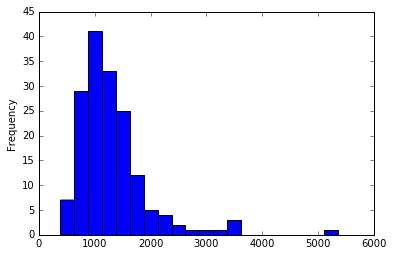

In [9]:
# import thinkstats2
# hist = thinkstats2.Hist(full_edu_table)

print(full_edu_table['Residents per Edu. Est.'].plot(by='Residents per Edu. Est.', kind='hist', bins=20))
# The vast majority of regions seem to serve around 1,000 residents per educational establishment.
# The lower the better.

Display the histogram.

In [10]:
import thinkplot
thinkplot.Hist(hist, label='establishments')
thinkplot.Show()

NameError: name 'hist' is not defined

Figure out the average income.

In [28]:
business = pandas.read_csv('datasets/business_est_values.csv', sep=',', encoding='latin-1', skiprows=13, skipfooter=25)
print(business.columns)

Index(['Geographic area name', 'Unnamed: 1', 'Unnamed: 2', '2012 NAICS code',
       'Meaning of 2012 NAICS code', 'Meaning of Gender code', 'Unnamed: 6',
       'Unnamed: 7', 'Meaning of Ethnicity code', 'Unnamed: 9',
       'Meaning of Race code', 'Year',
       'Number of firms with or without paid employees',
       'Sales, receipts, or value of shipments of firms with or without paid employees ($1,000)',
       'Number of firms with paid employees',
       'Sales, receipts, or value of shipments of firms with paid employees ($1,000)',
       'Number of paid employees for pay period including March 12',
       'Annual payroll ($1,000)',
       'Sales, receipts, or value of shipments of firms without paid employees ($1,000)',
       'Relative standard error of number of firms with or without paid employees (%)',
       'Relative standard error of sales, receipts, or value of shipments of firms with or without paid employees (%)',
       'Relative standard error of number of firms wi

/Users/user/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skip_footer; you can avoid this warning by specifying engine='python'.
  if __name__ == '__main__':


In [46]:
# business_floats = business[(business['Annual payroll ($1,000)'].map(type) == num) & business['Number of paid employees for pay period including March 12'].map(type) == num]
# business_floats = business[business['Annual payroll ($1,000)'].apply(float)]
business_floats = business[['Annual payroll ($1,000)', 'Number of paid employees for pay period including March 12']]
business_floats.str.replace(' ', '')
business_floats.astype(float).dropna()
# business_floats['salary'] = business_floats['Annual payroll ($1,000)'] / business_floats['Number of paid employees for pay period including March 12']
# print(business_floats['salary'])

AttributeError: 'DataFrame' object has no attribute 'str'